Project 10: Solving Systems of Linear Equations

    Objective:
        Use Python to solve a system of linear equations.

    Instructions:

	    Consider a system of two linear equations:
            a_1 x+b_1 y=c_1
            a_2 x+b_2 y=c_2 
Write a Python function solve_system(a1, b1, c1, a2, b2, c2) that solves for x and y using basic algebraic techniques (substitution or elimination).
	Print the values of x and y if a unique solution exists. If no solution or infinitely many solutions exist, print an appropriate message.
	
    Extension:
        Modify the function to handle systems of three equations in three variables, or use Python's NumPy library to solve the system using matrix methods.


The First thing i will do is define the function, and just have it return 0

In [ ]:
def solve_system(a1, b1, c1, a2, b2, c2):
    return 0

Next i will add some comments so it is easy to remember what we are trying to achieve.

In [ ]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    return 0

Okay, we have some comments and know what we are trying to achieve, now lets have a think about how we should solve these equations. There is several methods to solve simultaneous equations, the first is equating the second is subtraction or addition.

1) equating: this is a solid method for us to use, it is not very nice to write down on paper sometimes because of fractions however the PC shouldnt have these issues. we may experience bugs however via this method if we use division. the easiest way will be to only use multiplication if we want to solve to avoid fractions and rounding errors within the PC.

2) subtraction or addition: This method is good when using pen and paper because it removes steps, this may lead to a more favourable o(N) within the function, however there are alot of variables and things to take into account here.

I shall attempt to use equating, so as to avoid unnecessary for loops.

When equating we should first re arrange the equation so we have x on one side of the equation

In [ ]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    print(equation1, equation2)
    equation1, equation2, = [[a1],[c1, (b1*-1)]], [[a2],[c2, (b2*-1)]]
    print(equation1, equation2)
    return 0

solve_system(1, 2, 3, 4, 5, 6) # output: [[1, 2], [3]] [[4, 5], [6]] -> [[1], [3, -2]] [[4], [6, -5]]


[[1, 2], [3]] [[4, 5], [6]]
[[1], [3, -2]] [[4], [6, -5]]


0

Amazing the function now has only a1 and a2 on one side of the nested lists. it also moves b1 and b2 to  the otherside and makes it negative.

Next step is to make the co-efficients a1 and a2 the same and then multiply by the other.
for example is a1=2 and a2=3 then we need to multiply equation 1 by 3 and equation 2 by 6 to get the equations the same, i shall do this within a seperate function.

In [ ]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    equation1, equation2, = [[a1],[c1, (b1*-1)]], [[a2],[c2, (b2*-1)]]
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2


solve_system(1, 2, 3, 4, 5, 6) # output: [[1, 2], [3]] [[4, 5], [6]] -> [[1], [3, -2]] [[4], [6, -5]]
equate_coeff(2, 3) # output: 2  3 ---> 3  2

2 3
3 2


0

In [ ]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    print(f'equation1: {equation1} || equation2: {equation2}')
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))

    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    print(f'equation1: {equation1} || equation2: {equation2}')
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2

solve_system(1, 2, 3, 4, 5, 6)

equation1: [[1], [3, -2]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]]


0

Amazing, the function equate_coeff, will swap the a1 and a2 values for us allowing us to multiply each equation via the other. now we need a 3rd equation to collect b1 b2 c1 c2

In [ ]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    print(f'equation1: {equation1} || equation2: {equation2}')
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))

    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    print(f'equation1: {equation1} || equation2: {equation2}')
    equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
    print(f'equation1: {equation1} || equation2: {equation2} ||  equation3: {equation3}')
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2

solve_system(1, 2, 3, 4, 5, 6)

equation1: [[1], [3, -2]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]] ||  equation3: [[12, -8], [6, -5]]


0

Amazing now to rearrange equation 3 so we have Y values and constants. To achieve this i shall call some new variables c3 and b3 i shall then make equation3 == c3 , b3

In [29]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    print(f'equation1: {equation1} || equation2: {equation2}')
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))

    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    print(f'equation1: {equation1} || equation2: {equation2}')
    equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
    print(f'equation1: {equation1} || equation2: {equation2} ||  equation3: {equation3}')
    b3 = b1 - b2
    c3 = c1 - c2
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2


solve_system(1, 2, 3, 4, 5, 6)

equation1: [[1], [3, -2]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]] ||  equation3: [[12, -8], [6, -5]]
equation3: [[-3], [6]]


0

The next step is to make it so that we have a value for Y to do this we divide the Y coefficient by itself and also will need to divide Cby the Y coefficient.

In [33]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    print(f'equation1: {equation1} || equation2: {equation2}')
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))

    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    print(f'equation1: {equation1} || equation2: {equation2}')
    equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
    print(f'equation1: {equation1} || equation2: {equation2} ||  equation3: {equation3}')
    b3 = b1 - b2
    c3 = c1 - c2
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    b3 = b3 / b3
    c3 = c3 / b3
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2


solve_system(1, 2, 3, 4, 5, 6)

equation1: [[1], [3, -2]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]] ||  equation3: [[12, -8], [6, -5]]
equation3: [[-3], [6]]
equation3: [[1.0], [6.0]]


0

We Have a Bug upon debugging the code there is an issue with how i am working  out c3, since i made b3 by doing b1 - b2 i should make c3 by doing c2 - c1 instead of c1- c2 i shall now fix this

In [39]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    print(f'equation1: {equation1} || equation2: {equation2}')
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))

    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    print(f'equation1: {equation1} || equation2: {equation2}')
    equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
    print(f'equation1: {equation1} || equation2: {equation2} ||  equation3: {equation3}')
    b3 = b1 - b2
    c3 = c2 - c1
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    b3 = b3 / b3
    c3 = c3 / b3
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2


solve_system(1, 2, 3, 4, 5, 6)

equation1: [[1], [3, -2]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]] ||  equation3: [[12, -8], [6, -5]]
equation3: [[-3], [-6]]


equation3: [[1.0], [-6.0]]


0

There is still a bug we get y = 1 and c = -6 we should output y = 1 c = 2 the issue must be within the dividing c3 and b3

the bug has been caught see below image, i was using b3 to divide c3 however, i had already revalued b3 at 1, a fix could be to ignore the b3 divide and assign it a value of 1 after doing the c3 divide, however i dont want to do this as i would like to use this later on as a check. I shall need to do the c3 divide first before i revalue b3

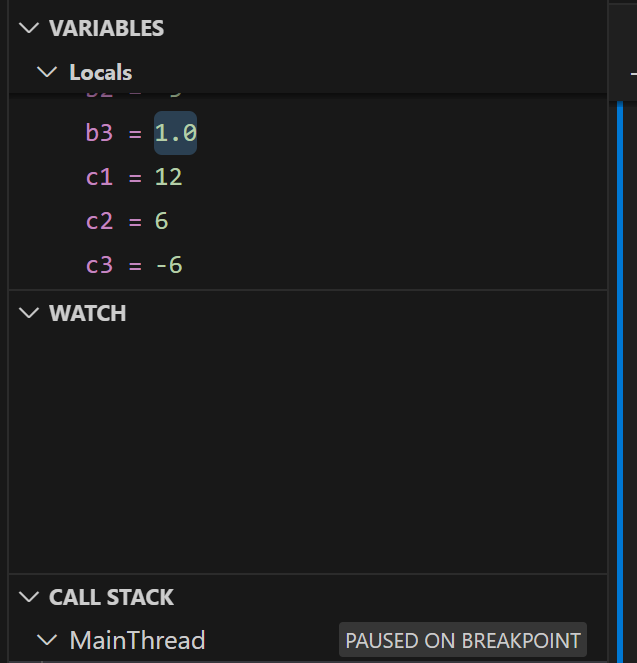

In [40]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    print(f'equation1: {equation1} || equation2: {equation2}')
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))

    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    print(f'equation1: {equation1} || equation2: {equation2}')
    equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
    print(f'equation1: {equation1} || equation2: {equation2} ||  equation3: {equation3}')
    b3 = b1 - b2
    c3 = c2 - c1
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    c3 = c3 / b3
    b3 = b3 / b3
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2


solve_system(1, 2, 3, 4, 5, 6)

equation1: [[1], [3, -2]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]] ||  equation3: [[12, -8], [6, -5]]
equation3: [[-3], [-6]]
equation3: [[1.0], [2.0]]


0

Amazing, we now have y = 1 and c = 2 which is what my own maths leads me to, lets save this y value asa different variable and then work out x which should be easy as we already rearranged the equation earlier.


In [42]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    print(f'equation1: {equation1} || equation2: {equation2}')
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))

    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    print(f'equation1: {equation1} || equation2: {equation2}')
    equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
    print(f'equation1: {equation1} || equation2: {equation2} ||  equation3: {equation3}')
    b3 = b1 - b2
    c3 = c2 - c1
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    c3 = c3 / b3
    b3 = b3 / b3
    equation3 = [[b3],[c3]]
    print(f'equation3: {equation3}')
    y =  c3
    x = (c1 + (y * b1)) / multeq1
    print(f'x = {x}')
    return 0

def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2


solve_system(1, 2, 3, 4, 5, 6)

equation1: [[1], [3, -2]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]]
equation1: [[4], [12, -8]] || equation2: [[4], [6, -5]] ||  equation3: [[12, -8], [6, -5]]
equation3: [[-3], [-6]]
equation3: [[1.0], [2.0]]
x = -1.0


0

Great, this worked smoothly. Now to make the final print statement then i an work on tidying up what we have as this function is big and im sure alot is unneeded.

In [47]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    print(f"""
You have given us the equations:
            {a1}x + {b1}y = {c1}
        And {a2}x + {b2}y = {c2}""")
    equation1 = [[a1, b1], [c1]]
    equation2 = [[a2, b2], [c2]]
    b1 = b1 * -1
    b2 = b2 * -1
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
    multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
    a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
    a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))
    equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
    equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
    b3 = b1 - b2
    c3 = c2 - c1
    equation3 = [[b3],[c3]]
    c3 = c3 / b3
    b3 = b3 / b3
    equation3 = [[b3],[c3]]
    y =  c3
    x = (c1 + (y * b1)) / multeq1
    print(f"""
For the equations given we result in the following solutions:
                  y= {y}
                  x= {x}
""")


def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2


#tests
solve_system(2, 3, 8, 1, -2, -4)
solve_system(4, 5, 9, 2, 7, 10)
solve_system(-3, 6, 15, 7, -4, 5)
solve_system(1, 1, 2, 3, 4, 7)
solve_system(10, -2, 14, -5, 3, -7)



You have given us the equations:
            2x + 3y = 8
        And 1x + -2y = -4

For the equations given we result in the following solutions:
                  y= 2.2857142857142856
                  x= 1.1428571428571432


You have given us the equations:
            4x + 5y = 9
        And 2x + 7y = 10

For the equations given we result in the following solutions:
                  y= 1.2222222222222223
                  x= 2.8888888888888884


You have given us the equations:
            -3x + 6y = 15
        And 7x + -4y = 5

For the equations given we result in the following solutions:
                  y= 4.0
                  x= -9.0


You have given us the equations:
            1x + 1y = 2
        And 3x + 4y = 7

For the equations given we result in the following solutions:
                  y= 1.0
                  x= 1.0


You have given us the equations:
            10x + -2y = 14
        And -5x + 3y = -7

For the equations given we result in the following solutions:

I have removed the unneccssary print statements for quick debugging and then added one at the start informing us of the equation and one at the end informing us of the solution, now to look at conditions for how to figure out if infinitely many solutions exists or 0 solutions i shall perform these checks at the start in seperate functions

In [52]:
def solve_system(a1, b1, c1, a2, b2, c2):
    #equation 1 is a1(x)+ b1(y) = c1
    #equation 2 is a2(x)+ b2(y) = c2
    #function  should return values of x and y if a solution exists and if other situations arise then we should specify this.
    print(f"""
You have given us the equations:
            {a1}x + {b1}y = {c1}
        And {a2}x + {b2}y = {c2}""")
    
    checkZeroSolution = a1 * b2 - a2 * b1

    if checkZeroSolution == 0:
        # Check for infinitely many solutions
        if a2 != 0 and b2 != 0 and c2 != 0:
            a_check = a1 / a2
            b_check = b1 / b2
            c_check = c1 / c2
            if a_check == b_check == c_check:
                print("The given equations represent the same line, therefore infinitely many solutions exist.")
                return
        print("The given equations are parallel and have no solution.")
        return
    else:
        equation1 = [[a1, b1], [c1]]
        equation2 = [[a2, b2], [c2]]
        b1 = b1 * -1
        b2 = b2 * -1
        equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]]
        multeq1, multeq2 = equate_coeff(a1, a2) #gets A2 and multiplies each section of equation 1 by A2 and vise versa for A1
        a1, b1, c1 = (variable * multeq1 for variable in (a1, b1, c1))
        a2, b2, c2 = (variable * multeq2 for variable in (a2, b2, c2))
        equation1, equation2, = [[a1],[c1, (b1)]], [[a2],[c2, (b2)]] #sets the equations with new coefficients.
        equation3 = [[c1, b1],[c2, b2]] #equation 3 is basically y1 + c1 = y2 + c2
        b3 = b1 - b2
        c3 = c2 - c1
        equation3 = [[b3],[c3]]
        c3 = c3 / b3
        b3 = b3 / b3
        equation3 = [[b3],[c3]]
        y =  c3
        x = (c1 + (y * b1)) / multeq1
        print(f"""
    For the equations given we result in the following solutions:
                    y= {y}
                    x= {x}
    """)


def equate_coeff(a1, a2):
    [a1, a2] = [a2, a1]
    return a1, a2

def checkInfinite(a1, b1, c1, a2, b2, c2):
    if a2 != 0 and b2 != 0 and c2 != 0:
        aCheck = a1 / a2
        bCheck = b1 / b2
        cCheck = c1 / c2
        if aCheck == bCheck == cCheck:
            return True
    return False

# Infinitely many solutions
solve_system(1, 2, 3, 2, 4, 6)  
solve_system(3, 6, 9, -3, -6, -9)  

# No solution
solve_system(1, 2, 3, 2, 4, 7)  
solve_system(5, -3, 10, -10, 6, -15)  

# Unique solution
solve_system(2, 3, 8, 1, -2, -4)  
solve_system(4, -2, 6, 1, 1, 5)  
solve_system(1, 1, 2, 3, -4, 6)  
solve_system(7, -5, 2, 3, 2, 8)  
solve_system(6, -3, 9, -8, 4, -12)  
solve_system(10, 15, 25, -5, -10, -15)  



You have given us the equations:
            1x + 2y = 3
        And 2x + 4y = 6
The given equations represent the same line, therefore infinitely many solutions exist.

You have given us the equations:
            3x + 6y = 9
        And -3x + -6y = -9
The given equations represent the same line, therefore infinitely many solutions exist.

You have given us the equations:
            1x + 2y = 3
        And 2x + 4y = 7
The given equations are parallel and have no solution.

You have given us the equations:
            5x + -3y = 10
        And -10x + 6y = -15
The given equations are parallel and have no solution.

You have given us the equations:
            2x + 3y = 8
        And 1x + -2y = -4

    For the equations given we result in the following solutions:
                    y= 2.2857142857142856
                    x= 1.1428571428571432
    

You have given us the equations:
            4x + -2y = 6
        And 1x + 1y = 5

    For the equations given we result in the followin